In [1]:
import math

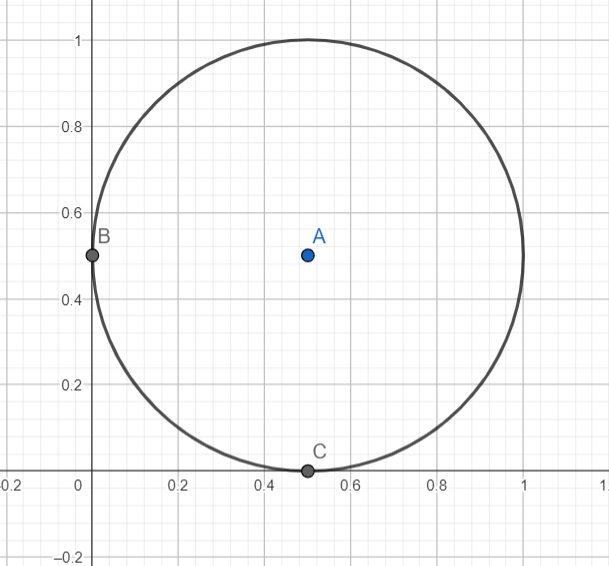

Circle: 

$$
\left(x - \frac{1}{2}\right)^2 + \left(y - \frac{1}{2}\right)^2 = \left(\frac{1}{2}\right)^2 \\~\\
y - \frac{1}{2} = \pm\sqrt{\frac{1}{4} - \left(x - \frac{1}{2}\right)^2 }\\~\\
y = \frac{1}{2} \pm \sqrt{\frac{1}{4} - \left(x - \frac{1}{2}\right)^2 }
$$

Area of L-section: 


$$
\int_0^\frac{1}{2} \frac{1}{2} - \sqrt{\frac{1}{4} - \left(x - \frac{1}{2}\right)^2 }
$$

In [2]:
import scipy.integrate as integrate

def y(x: float) -> float: 
    return 1/2 - math.sqrt(1/4 - math.pow(x - 1/2, 2))

L = integrate.quad(y, 0, 1/2)[0]
L

0.05365045915063791

After $n$ circles, we connect the origin with the point $(n, 1)$, making the line $y = \frac{x}{n}$. We first find where it cuts the circle via solving the equation

$$
\frac{x}{n} = \frac{1}{2} - \sqrt{\frac{1}{4} - \left(x - \frac{1}{2}\right)^2}
$$

In [3]:
from scipy.optimize import fsolve


def solve(n: int) -> float:
    return fsolve(lambda x: y(x) - x/n, [0])

r = solve(1)[0]
r 

C:\Users\duc\AppData\Local\Temp\ipykernel_16524\2672458873.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/2 - math.sqrt(1/4 - math.pow(x - 1/2, 2))


np.float64(0.1464466094067262)

Then we integrate the linear function from $0$ to $r$ and the circle from $r$ to $\frac{1}{2}$

In [4]:
def concave_triangle_area(n: int) -> float:
    r: float = solve(n)
    return integrate.quad(lambda x: x / n, 0, r)[0] + integrate.quad(lambda x: y(x), r, 1/2)[0]

def concave_triangle_ratio(n: int) -> float:
    global L
    return concave_triangle_area(n) / L

concave_triangle_ratio(1)

C:\Users\duc\AppData\Local\Temp\ipykernel_16524\2672458873.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/2 - math.sqrt(1/4 - math.pow(x - 1/2, 2))


0.5

In [5]:
i = 2
while concave_triangle_ratio(i) >= 0.1 / 100:
    i += 1
i

C:\Users\duc\AppData\Local\Temp\ipykernel_16524\2672458873.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/2 - math.sqrt(1/4 - math.pow(x - 1/2, 2))


2240

Bonus: can I try this problem with Newton-Raphson by me?

In [6]:
from typing import Callable
import math
def newton_raphson(f: Callable[[float], float], n: float, x0: float = 0.5, iter: int = 10 ** 4, tol: float = 10 ** (-6)) -> float:
    epsilon: float = 10 ** (-8)
    for _ in range(iter):
        f_prime_x0 = (f(x0 + epsilon) - f(x0)) / epsilon
        x0 -= (f(x0) - n) / f_prime_x0
    
    if math.isclose(f(x0), n, abs_tol= tol):
        return x0
    return x0

newton_raphson(lambda x: x ** 2, 2)
    

1.414213562373095

In [9]:
newton_raphson(concave_triangle_ratio, 0.1 / 100)

C:\Users\duc\AppData\Local\Temp\ipykernel_16524\2672458873.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/2 - math.sqrt(1/4 - math.pow(x - 1/2, 2))


2239.108494385987